In [10]:
import pandas as pd
import numpy as np
import random
import warnings
from array import *

warnings.filterwarnings('ignore')

In [11]:
data_guru = pd.read_excel('data guru.xlsx')

data_sekolah = pd.read_excel('data sekolah.xlsx')

data_jarak = pd.read_excel('JARAK.xlsx')

dftr_guru = np.array(data_guru['Id Guru'])
dftr_sekolah = np.array(data_sekolah['id'])

In [12]:
ids = []
def kelas() : #untuk membuat setiap kelas menjadi 6
    indeks = 0
    for i in range (0,636) :
        if(((i>0) and (i%6==0))):
            indeks = indeks + 1
        ids.append(dftr_sekolah[indeks])
    return ids

In [13]:
print(kelas())

[45, 45, 45, 45, 45, 45, 48, 48, 48, 48, 48, 48, 51, 51, 51, 51, 51, 51, 56, 56, 56, 56, 56, 56, 67, 67, 67, 67, 67, 67, 87, 87, 87, 87, 87, 87, 93, 93, 93, 93, 93, 93, 96, 96, 96, 96, 96, 96, 100, 100, 100, 100, 100, 100, 108, 108, 108, 108, 108, 108, 132, 132, 132, 132, 132, 132, 133, 133, 133, 133, 133, 133, 140, 140, 140, 140, 140, 140, 142, 142, 142, 142, 142, 142, 143, 143, 143, 143, 143, 143, 146, 146, 146, 146, 146, 146, 151, 151, 151, 151, 151, 151, 153, 153, 153, 153, 153, 153, 160, 160, 160, 160, 160, 160, 161, 161, 161, 161, 161, 161, 167, 167, 167, 167, 167, 167, 168, 168, 168, 168, 168, 168, 170, 170, 170, 170, 170, 170, 175, 175, 175, 175, 175, 175, 182, 182, 182, 182, 182, 182, 185, 185, 185, 185, 185, 185, 186, 186, 186, 186, 186, 186, 189, 189, 189, 189, 189, 189, 204, 204, 204, 204, 204, 204, 216, 216, 216, 216, 216, 216, 222, 222, 222, 222, 222, 222, 228, 228, 228, 228, 228, 228, 234, 234, 234, 234, 234, 234, 246, 246, 246, 246, 246, 246, 249, 249, 249, 249, 249, 24

In [14]:
def guru() : #untuk membagi guru secara random ke kelas-kelas dari semua sekolah
    indeks = 0
    jarak = []
    id_guru = np.random.permutation(dftr_guru)
    for i in range (len(id_guru)) :
        if(((i>0) and (i%6==0))):
            indeks = indeks + 1
        jarak_guru = data_jarak.loc[(data_jarak['No_IDG'].values == id_guru[i]) & (data_jarak['No_IDS'].values == ids[indeks]), ['Jarak']]
        jarak.append(jarak_guru.values) 
    arr = np.array([id_guru,jarak], dtype = float)
    return arr

In [15]:
def hitung_total_jarak(kromosom): #untuk menghitung total jarak
    total_jarak = [] 
    for i in range (len(kromosom)): 
        jarak_total_kromosom = sum(kromosom[i][1])
        total_jarak.append(jarak_total_kromosom) 
    return total_jarak

def hitung_fitness(totalJarak,maksimal): #untuk menghitung fitness
    fitKromosom = [] 
    for i in totalJarak:
        fitness = 1/i
        fitKromosom.append(fitness) 
    return fitKromosom

def hitung_probabilitas (fitnessKromosom): #untuk menghitung probabilitas
    prob = [] 
    total_fit = sum(fitnessKromosom)
    for i in range (len(fitnessKromosom)):
        probabilitas = fitnessKromosom[i]/total_fit
        prob.append(probabilitas)  
    return prob

def roulette_whell(probabilitas): #untuk mencari kemungkinan menggunakan Roulette_whell
    rentang = np.cumsum(probabilitas)
    angka_random = random.uniform(0,1)
    #print("Bilangan Random : ",angka_random)
    if angka_random >= 0 and angka_random <= rentang[0]:
        return 0
    elif angka_random > rentang[0] and angka_random <= rentang[1]:
        return 1
    elif angka_random > rentang[1] and angka_random <= rentang[2]:
        return 2
    elif angka_random > rentang[2] and angka_random <= rentang[3]:
        return 3
    elif angka_random > rentang[3] and angka_random <= rentang[4]:
        return 4
    elif angka_random > rentang[4] and angka_random <= rentang[5]:
        return 5
    elif angka_random > rentang[5] and angka_random <= rentang[6]:
        return 6
    elif angka_random > rentang[6] and angka_random <= rentang[7]:
        return 7
    elif angka_random > rentang[7] and angka_random <= rentang[8]:
        return 8
    elif angka_random > rentang[8] and angka_random <= rentang[9]:
        return 9

def induk_terpilih(probab,populasi): #untuk memilih induk yang terpilih berdasarkan Roullet-Whell untuk Crossover
    idx_terpilih = []
    kromosom_terpilih = [] 
    for i in range(2):
        idx_terpilih.append(roulette_whell(probab))
        kromosom_terpilih.append(populasi[idx_terpilih[i]])
    return kromosom_terpilih 

def kromosom_induk(parent_terpilih): #untuk mengambil nilai Id Guru ke Sekolah dari induk yang telah terpilih
    par1 = []
    par2 = []
    for i in range (0,636):
        parent1 = parent_terpilih[0][0][i]
        parent2 = parent_terpilih[1][0][i]
        par1.append(parent1)
        par2.append(parent2)
    return par1, par2

def crossover(induk1, induk2):#untuk melakukan kawin silang/crossover antara 2 parrent  
    import random
    b = random.randint(0,(len(dftr_guru)-1))
    b #titik acuan ini dipilih secara random
    calon1 = induk1[0:b]
    calon2 = induk2[0:b]
    for i in induk1 :
        if i not in calon2:
            calon2.append(i)
    for i in induk2 :
            if i not in calon1:
                calon1.append(i)
    return calon1, calon2

def krom_anak(anak) : #untuk membangkitkan kromosom anak
    jarak_anak_ = []
    indeks = 0
    for i in range (len(anak)) :
        if(((i>0) and (i%6==0))):
            indeks = indeks + 1
        jarak_anak = data_jarak.loc[(data_jarak['No_IDG'].values == anak[i]) & (data_jarak['No_IDS'].values == ids[indeks]), ['Jarak']]
        jarak_anak_.append(jarak_anak.values) 
    arr_anak = np.array([anak,jarak_anak_], dtype = float)
    return arr_anak

def induk_terpilih_untuk_mutasi(probab,populasi): #untuk memilih induk yang terpilih berdasarkan Roullet-Whell untuk mutasi
    idx_terpilih = []
    kromosom_terpilih = []
    for i in range(1):
        idx_terpilih.append(roulette_whell(probab))
        kromosom_terpilih.append(populasi[idx_terpilih[i]])
    return kromosom_terpilih 

def kromosom_induk_untuk_mutasi(parent_terpilih): #untuk mengambil nilai Id Guru ke Sekolah dari induk yang telah terpilih
    par1 = []
    for i in range (0,636):
        parent1 = parent_terpilih[0][0][i]
        par1.append(parent1)
    return par1

def mutasi(induk1):#untuk melakukan kawin silang/crossover antara 2 parrent  
    nilai_random = []
    while True:
        b1 = random.randint(0,(len(dftr_guru)-1))
        b1 #titik ini dipilih secara Random
        b2 = random.randint(0,(len(dftr_guru)-1))
        b2 #titik ini dipilih secara Random
        if b1 == b2: True
        else : break
    induk1[b1], induk1[b2] = induk1[b2], induk1[b1]
    return induk1

In [16]:
jumlahPopulasi = int(input('Jumlah Kromosom dalam 1 Populasi : '))
jumlahIterasi = int(input('Jumlah Iterasi : '))
p = int(input('p : '))
totalJarakBaru = []
fitness_terbaik = []
kromosom = []
for i in range (jumlahPopulasi) :
    kromosom.append(guru())
    
for y in range (jumlahIterasi) :
    kromosomAnak = []
    if ((y+1) % p == 0) :
        print()
        print('============================================= ITERASI Ke-',y+1,'=============================================')
        print()
        print('==> Kromosom Awal ')
        print(kromosom)
        print()
        totalJarakKromosom = (hitung_total_jarak(kromosom))
        print('==> Jarak Total Kromosom Awal ')
        print(totalJarakKromosom)
        print()
        print('==> Jarak Total Minimum Kromosom Awal ')
        print(min(totalJarakKromosom))
        print()
        fitnessKromosom = (hitung_fitness(totalJarakKromosom,max(totalJarakKromosom)))
        print('==> Fitness Kromosom Awal ')
        print(fitnessKromosom)
        print()
        probabilitasKromosom = (hitung_probabilitas (fitnessKromosom))
        print('==> Probabilitas Seleksi Kromosom Awal ')
        print(probabilitasKromosom)
        print()
        print('------------------------------------------------------------------')
        print()
        parent_terpilih = induk_terpilih_untuk_mutasi(probabilitasKromosom,kromosom)
        print('==> Parent Terpilih ')
        print(parent_terpilih)
        print()
        kromosomParent = kromosom_induk_untuk_mutasi(parent_terpilih)
        parent1 = kromosomParent
        calonAnak = mutasi(parent1)
        calonAnak1 = calonAnak
        kromosomAnak1 = krom_anak(calonAnak1)
        kromosomAnak.append(kromosomAnak1)
        print('==> Kromosom Anak ')
        print(kromosomAnak)
        print()
        totalJarakAnak = (hitung_total_jarak(kromosomAnak))
        print('==> Jarak Total Anak ')
        print(totalJarakAnak)
        print()
        fitnessAnak = (hitung_fitness(totalJarakAnak,max(totalJarakKromosom)))
        print('==> Fitness Anak ')
        print(fitnessAnak)
        print()
        def compare2(fit_anak, calon_anak, kromosomAwal, fit):
            kromosomBaru = []
            for i in range (len(fit_anak)):
                if(max(fit_anak) > min(fit)):
                    idx_bagus = fit_anak.index(max(fit_anak))
                    bagus_anak = calon_anak.pop(idx_bagus)
                    bagus = fit_anak.pop(idx_bagus)
                    fit.append(bagus)
                    idx_jelek = fit.index(min(fit))
                    fit.pop(idx_jelek)
                    kromosomAwal.pop(idx_jelek)
                    kromosomAwal.append(bagus_anak)
                    kromosomBaru = kromosomAwal
            return kromosomAwal
        compare3 = compare2(fitnessAnak, kromosomAnak, kromosom, fitnessKromosom)
        print('------------------------------------------------------------------')
        print()
        print('==> Kromosom Baru Adalah ')
        print(compare3)
        print()
        totalJarakKromosomBaru = (hitung_total_jarak(compare3))
        print('==> Jarak Total Kromosom Baru Adalah ')
        print(totalJarakKromosomBaru)
        print()
        fitnessKromosomBaru = (hitung_fitness(totalJarakKromosomBaru,max(totalJarakKromosom)))
        print('==> Fitness Kromosom Baru Adalah ')
        print(fitnessKromosomBaru)
        print()
        print('==> Jarak Total Minimum Kromosom Baru Adalah ')
        print(min(totalJarakKromosomBaru))
        print()
        print('==> Fitness Maksimum Kromosom Baru Adalah ')
        print(max(fitnessKromosomBaru))
        print()
        fitness_terbaik.append(max(fitnessKromosomBaru))
        totalJarakBaru.append(min(totalJarakKromosomBaru))
    else :
        print()
        print('============================================= ITERASI Ke-',y+1,'=============================================')
        print()
        print('==> Kromosom Awal ')
        print(kromosom)
        print()
        totalJarakKromosom = (hitung_total_jarak(kromosom))
        print('==> Jarak Total Kromosom Awal ')
        print(totalJarakKromosom)
        print()
        print('==> Jarak Total Minimum Kromosom Awal ')
        print(min(totalJarakKromosom))
        print()
        fitnessKromosom = (hitung_fitness(totalJarakKromosom,max(totalJarakKromosom)))
        print('==> Fitness Kromosom Awal ')
        print(fitnessKromosom)
        print()
        probabilitasKromosom = (hitung_probabilitas (fitnessKromosom))
        print('==> Probabilitas Seleksi Kromosom Awal ')
        print(probabilitasKromosom)
        print()
        print('------------------------------------------------------------------')
        print()
        parent_terpilih = induk_terpilih(probabilitasKromosom,kromosom)
        print('==> Parent Terpilih ')
        print(parent_terpilih)
        print()
        kromosomParent = kromosom_induk(parent_terpilih)
        parent1 = kromosomParent[0]
        parent2 = kromosomParent[1]
        calonAnak = crossover(parent1, parent2)
        calonAnak1 = calonAnak[0]
        calonAnak2 = calonAnak[1]
        kromosomAnak1 = krom_anak(calonAnak1)
        kromosomAnak2 = krom_anak(calonAnak2)
        kromosomAnak.append(kromosomAnak1)
        kromosomAnak.append(kromosomAnak2)
        print('==> Kromosom Anak ')
        print(kromosomAnak)
        print()
        totalJarakAnak = (hitung_total_jarak(kromosomAnak))
        print('==> Jarak Total Anak ')
        print(totalJarakAnak)
        print()
        fitnessAnak = (hitung_fitness(totalJarakAnak,max(totalJarakKromosom)))
        print('==> Fitness Anak ')
        print(fitnessAnak)
        print()
        def compare2(fit_anak, calon_anak, kromosomAwal, fit):
            kromosomBaru = []
            for i in range (len(fit_anak)):
                if(max(fit_anak) > min(fit)):
                    idx_bagus = fit_anak.index(max(fit_anak))
                    bagus_anak = calon_anak.pop(idx_bagus)
                    bagus = fit_anak.pop(idx_bagus)
                    fit.append(bagus)
                    idx_jelek = fit.index(min(fit))
                    fit.pop(idx_jelek)
                    kromosomAwal.pop(idx_jelek)
                    kromosomAwal.append(bagus_anak)
                    kromosomBaru = kromosomAwal
            return kromosomAwal
        compare3 = compare2(fitnessAnak, kromosomAnak, kromosom, fitnessKromosom)
        print('------------------------------------------------------------------')
        print()
        print('==> Kromosom Baru Adalah ')
        print(compare3)
        print()
        totalJarakKromosomBaru = (hitung_total_jarak(compare3))
        print('==> Jarak Total Kromosom Baru Adalah ')
        print(totalJarakKromosomBaru)
        print()
        fitnessKromosomBaru = (hitung_fitness(totalJarakKromosomBaru,max(totalJarakKromosom)))
        print('==> Fitness Kromosom Baru Adalah ')
        print(fitnessKromosomBaru)
        print()
        print('==> Jarak Total Minimum Kromosom Baru Adalah ')
        print(min(totalJarakKromosomBaru))
        print()
        print('==> Fitness Maksimum Kromosom Baru Adalah ')
        print(max(fitnessKromosomBaru))
        print()
        fitness_terbaik.append(max(fitnessKromosomBaru))
        totalJarakBaru.append(min(totalJarakKromosomBaru))

print()
print('==========================================================================================')
print()
print('FITNESS TOTAL MAKSIMUM KESELURUHAN ',fitness_terbaik)
print('SOLUSI OPTIMUM ',max(fitness_terbaik))
print()
print('JARAK TOTAL MINIMUM KESELURUHAN ',totalJarakBaru)
print('SOLUSI OPTIMUM ',min(totalJarakBaru))

Jumlah Kromosom dalam 1 Populasi : 10
Jumlah Iterasi : 100
p : 50

============================================= ITERASI Ke- 1 =============================================

==> Kromosom Awal 
[array([[1.35000000e+03, 1.81100000e+03, 1.73300000e+03, ...,
        2.62700000e+03, 2.97000000e+03, 4.77000000e+02],
       [1.77048886e+01, 5.24318582e+00, 5.86238009e-01, ...,
        5.48286205e+01, 1.73782103e+01, 1.90244669e+01]]), array([[ 322.        ,  593.        , 1871.        , ..., 1911.        ,
        1228.        , 1388.        ],
       [   9.284417  ,   18.67776186,   22.80004173, ...,   16.95789246,
          31.63381097,   17.84490786]]), array([[3026.        ,  426.        , 2271.        , ..., 1711.        ,
        2507.        , 2797.        ],
       [  18.9925517 ,   14.11027576,   14.80798157, ...,   10.07330783,
           6.82844267,   16.40657886]]), array([[1535.        ,  868.        ,  667.        , ..., 1532.        ,
        1711.        , 1150.        ],
    

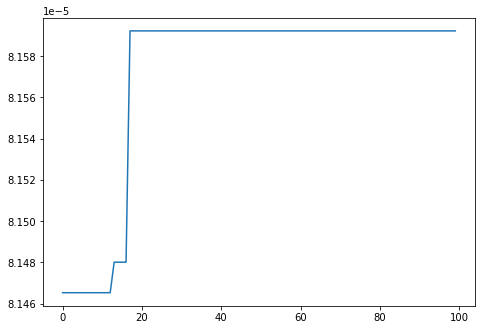

[8.146531631619042e-05, 8.146531631619042e-05, 8.146531631619042e-05, 8.146531631619042e-05, 8.146531631619042e-05, 8.146531631619042e-05, 8.146531631619042e-05, 8.146531631619042e-05, 8.146531631619042e-05, 8.146531631619042e-05, 8.146531631619042e-05, 8.146531631619042e-05, 8.146531631619042e-05, 8.148011337788451e-05, 8.148011337788451e-05, 8.148011337788451e-05, 8.148011337788451e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.159225284978188e-05, 8.15922528

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(fitness_terbaik)
plt.show()
print(fitness_terbaik)

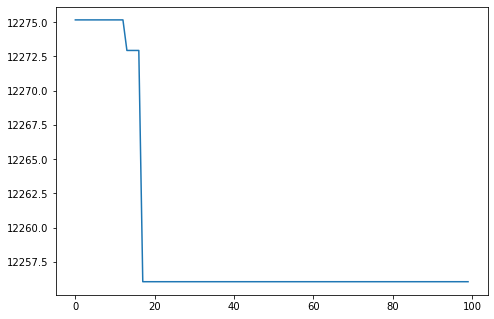

[12275.162550387839, 12275.162550387839, 12275.162550387839, 12275.162550387839, 12275.162550387839, 12275.162550387839, 12275.162550387839, 12275.162550387839, 12275.162550387839, 12275.162550387839, 12275.162550387839, 12275.162550387839, 12275.162550387839, 12272.933339724856, 12272.933339724856, 12272.933339724856, 12272.933339724856, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262, 12256.065558590262,

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(totalJarakBaru)
plt.show()
print(totalJarakBaru)